# Data Loader

- .. / images / **train** / **hires**  (5343 images)
- .. / images / **train** / **lowres** (5343 images)


- .. / images / **valid** / **hires**  (248 images)
- .. / images / **valid** / **lowres** (248 images)

In [1]:
import fastai
from fastai.vision import *

---

## ImageImageList - ItemList suitable for Image to Image tasks
Create a list of 11 182 images (all images, in every subfolders).  
11 182 = (5343 *train lowres* + 248 *valid lowres*) x 2 (*each lowres has its hires version*)

In [2]:
ImageImageList.from_folder('../images/')

ImageImageList (11182 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: ../images

## Filter the image list (11 182) to keep only lowres as input (5591)
filter_by_func() is receiving a Path object from the pathlib library and should returns *True* to include the file.  

The path is the complete path/filename of each file.  
as_posix() : return a string representation of the path with forward slashes

In [3]:
ImageImageList.from_folder('../images/').filter_by_func( lambda path: 'lowres' in path.parent.as_posix() )

ImageImageList (5591 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: ../images

## Split the 5591 images by their two folders
- train : 5343 images
- valid : 248 images

In [4]:
(
    ImageImageList.from_folder('../images/')
    .filter_by_func( lambda path: 'lowres' in path.parent.as_posix() )
    
    .split_by_folder()
)

ItemLists;

Train: ImageImageList (5343 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: ../images;

Valid: ImageImageList (248 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: ../images;

Test: None

## Labeling: Match the input image (lowres) to its label image (hires)
The lamda function is returing the Path to the label image (target) from the input image path.

In [5]:
(
    ImageImageList.from_folder('../images/')
    .filter_by_func(lambda path: 'lowres' in path.parent.as_posix()) # filter to have only /lowres/ as source
    .split_by_folder()                                               # use the folders to split in train/valid
    
    .label_from_func(lambda path: path.parents[1]/'hires'/path.name) # change /lowres/ to /hires/ to match source with target
)

LabelLists;

Train: LabelList
y: ImageItemList (5343 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: ../images
x: ImageImageList (5343 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: ../images;

Valid: LabelList
y: ImageItemList (248 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: ../images
x: ImageImageList (248 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: ../images;

Test: None

## Convert the LabelLists to an ImageDataBunch
- define the batch size of the ImageDataBunch (the data loader object)
- normalize to imagenet stats
- *do_y* allows normalization of Y (target hires images) in addition to X (lowres input images)

In [12]:
batch_size = 24

data_loader = (
    ImageImageList.from_folder('../images/')
    .filter_by_func(lambda path: 'lowres' in path.parent.as_posix()) # filter to have only /lowres/ as source
    .split_by_folder()                                               # use the folders to split in train/valid
    .label_from_func(lambda path: path.parents[1]/'hires'/path.name) # change /lowres/ to /hires/ to match source with target
    
    .databunch(bs=batch_size)
    .normalize(imagenet_stats, do_x=True, do_y=True) # convert the LabelLists in ImageDataBunch and normalize to imagenet both X and Y
)

data_loader

ImageDataBunch;

Train: LabelList
y: ImageItemList (5343 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: ../images
x: ImageImageList (5343 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: ../images;

Valid: LabelList
y: ImageItemList (248 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: ../images
x: ImageImageList (248 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]...
Path: ../images;

Test: None

---

## Display images from data loader

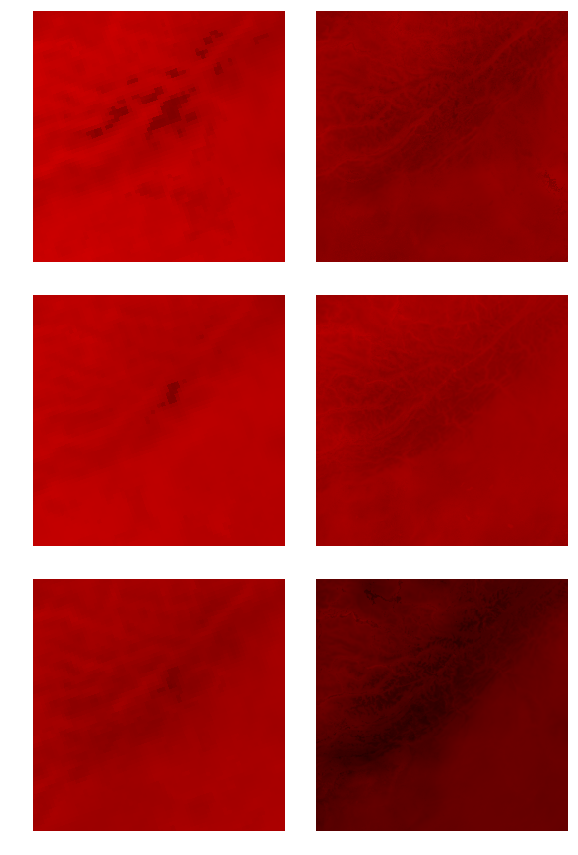

In [8]:
data_loader.show_batch(3)